In [56]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim, utils
import torch.nn as nn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [57]:
df = pd.read_csv("./cpcs433_assignment_2.csv")
df = df.drop(["Unnamed: 0","handle"], axis=1)
df.head()

,A_mean,B_mean,C_mean,D_mean,E_mean,A_max,B_max,C_max,D_max,E_max,...,B_attempts,C_attempts,D_attempts,E_attempts,A_solved,B_solved,C_solved,D_solved,E_solved,rank
0,1,1,1,1.0,0.933333,1,1,1,1,1,...,1.166667,1.500000,1.500000,4.000000,1.2,1.2,1.4,1.2,1.2,0.5
1,1,1,1,1.0,1.000000,1,1,1,1,1,...,1.000000,1.000000,1.333333,2.166667,1.2,1.2,1.2,1.2,1.2,0.8
2,1,1,1,1.0,1.000000,1,1,1,1,1,...,1.000000,1.166667,1.666667,2.000000,1.2,1.2,1.2,1.2,1.2,0.9
3,1,1,1,1.0,1.000000,1,1,1,1,1,...,1.666667,1.333333,1.166667,2.833333,1.2,1.2,1.2,1.2,1.2,0.8
4,1,1,1,1.0,0.950000,1,1,1,1,1,...,1.166667,1.666667,1.666667,1.500000,1.2,1.2,1.2,1.2,1.0,0.5


In [58]:
X = df.drop("rank", axis=1)
Y = df.loc[: , "rank"]


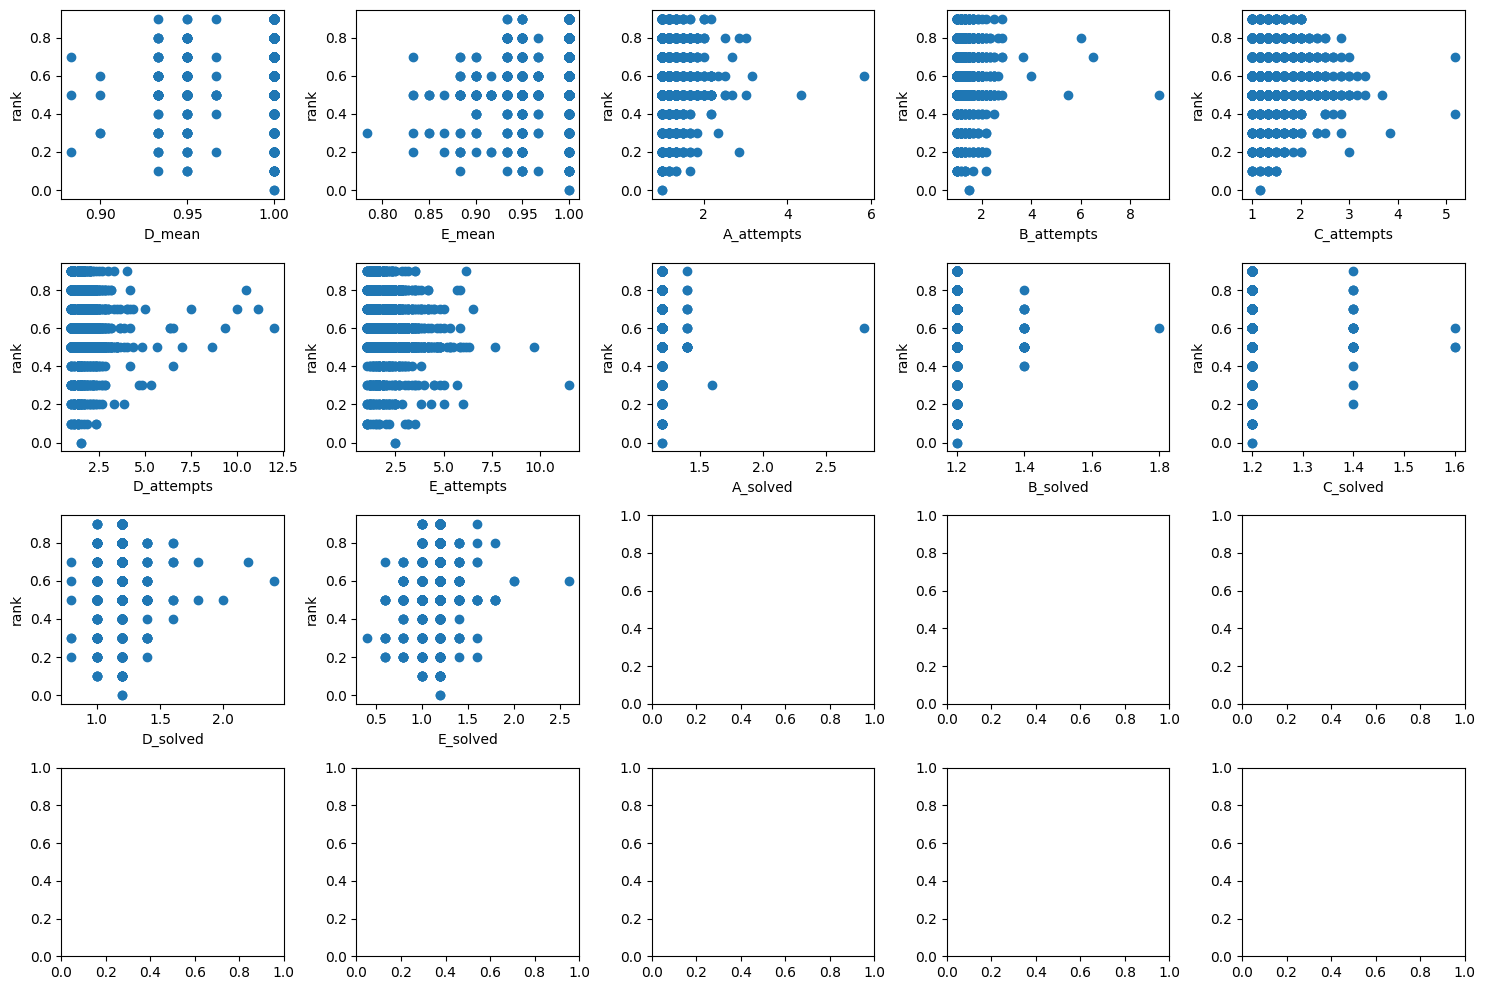

In [59]:
import matplotlib.pyplot as plt

# Specify the features you want to visualize
features = [ 'D_mean', 'E_mean', 
            'A_attempts', 'B_attempts', 'C_attempts', 'D_attempts', 'E_attempts', 'A_solved', 'B_solved',
            'C_solved', 'D_solved', 'E_solved']

# Create scatter plots for each feature against the rank
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for i, feature in enumerate(features):
    row = i // 5
    col = i % 5
    axs[row, col].scatter(df[feature], df['rank'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('rank')

plt.tight_layout()
plt.show()

In [60]:
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(Y)
print(encoded_y)

[5 8 9 ... 8 6 5]


In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, stratify=encoded_y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([  2,  12,  38,  56,  46, 721, 461, 235, 271,  76]))


In [62]:
from sklearn import svm,tree
from sklearn.ensemble import RandomForestClassifier

svm.SVC 

sklearn.svm._classes.SVC

In [63]:
_hyperparameters = {
    #will use gridsearch to look for best hyperpraramets
}
estimator = svm.SVC(**_hyperparameters)
_ = estimator.fit(x_train, y_train)
_train_predictions  = estimator.predict(x_test)
_report = metrics.classification_report(_train_predictions ,y_test)
print(_report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.38      0.55       533
           6       0.01      1.00      0.02         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.38       534
   macro avg       0.11      0.15      0.06       534
weighted avg       1.00      0.38      0.55       534



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear","sigmoid"]} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.375 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.375 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.378 total time=   1.1s


KeyboardInterrupt: ignored

# NN


In [144]:
model = nn.Sequential(
    #first layer
    nn.Linear(20, 50),
    nn.Sigmoid(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(50),  
    #second layer
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(50),  
    #third layer
    nn.Linear(50, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.BatchNorm1d(100),  
    #output
    nn.Linear(100, len(np.unique(y_train))) 
) 


In [145]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

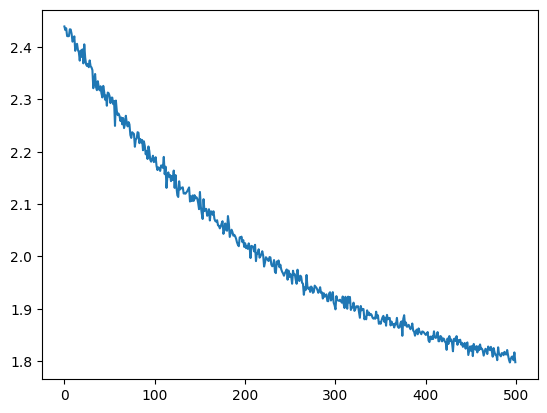

In [146]:
loss_fn = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(), lr = 0.01 , momentum = 0.3)
epochs = 500
ls=[]
model.train()  # Enable dropout during training

for epoch in range(epochs):
      logits =  model(x_train_tensor)
      loss = loss_fn(logits,y_train_tensor )
      loss.backward()            
      optimizer.step()           
      optimizer.zero_grad()      
      ls.append(loss.item())
model.eval()  # Disable dropout during evaluation

plt.figure()
plt.plot(ls)
